## Import

In [296]:
try:
    from urllib.request import urlopen
except ImportError:
    from urllib2 import urlopen
from bs4 import BeautifulSoup
import requests
import urllib2

import pandas as pd
import time

In [ ]:
## set up the website to extract

In [35]:
# starting with the search term data scientist
url = "https://www.careerjet.sg/data-scientist-jobs.html"
#download the URL and extract the content to the variable html 

page = requests.get(url)

#specifying a desired format of “page” using the html parser - 
# this allows python to read the various components of the page, rather than treating it as one long string.
soup = BeautifulSoup(page.text, "html.parser")


In [36]:
#printing soup in a more structured tree format that makes for easier reading
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN">
<!-- BEGIN autohandler -->
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <script async="" src="https://apis.google.com/js/plusone.js" type="text/javascript">
   {"lang": "en-US"}
  </script>
  <title>
   Data Scientist jobs in Singapore | Careerjet.sg
  </title>
  <meta content="All Data Scientist jobs in Singapore on Careerjet.sg, the search engine for jobs in Singapore" name="description"/>
  <meta content="Data Scientist, job, jobs, recruitment, employment, job Data Scientist, jobs Data Scientist, recruitment Data Scientist, employment Data Scientist" name="keywords"/>
  <meta content="Data Scientist jobs in Singapore | Careerjet.sg" property="og:title">
   <meta content="website" property="og:type">
    <meta content="All Data Scientist jobs in Singapore on Careerjet.sg, the search engine for jobs in Singapore" property="og:description">
     <meta content="https://ssl-static.care

In [43]:
# *extracting info by column

# def extract_job_title_from_result(soup): 
#     jobs = []
#     for div in soup.find_all(name="div", attrs={"class":"row"}):
#         for a in div.find_all(name="h1", attrs={"data-tn-element":"job_title"}):
#             jobs.append(a["title"])
#             return(jobs)

# extract_job_title_from_result(soup)


## As there is issue finding the tag via beautiful soup alone for mycareersfuture, selenium will be used

In [1]:
import os
from selenium import webdriver

# Import sleep:
from time import sleep

from bs4 import BeautifulSoup
import urllib
import urllib2

In [2]:
chromedriver = "./chromedriver/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver
# driver = webdriver.Chrome(chromedriver)

In [84]:
# Visit our relevant page.
driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver.exe")
driver.get("https://www.mycareersfuture.sg/search?search=business%20analyst&page=0")

# Wait six second.
sleep(6)
# Grab the page source.
html = driver.page_source

In [85]:
# Beautiful Soup it!
soup = BeautifulSoup(html, 'lxml')

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   Search results | MyCareersFuture
  </title>
  <meta content="MyCareersFuture " property="og:title"/>
  <meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have considered before, or find jobs with government support." property="og:description"/>
  <meta content="https://www.mycareersfuture.sg" property="og:url"/>
  <meta content="https://www.mycareersfuture.sg/images/og-mcf-logo.png" property="og:image"/>
  <meta content="MyCareersFuture" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="cNK77SoJSM_t-TivaafxeOjn7sqTJDdi7TVwyMDLtLA" name="google-site-verification"/>
  <meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitabl
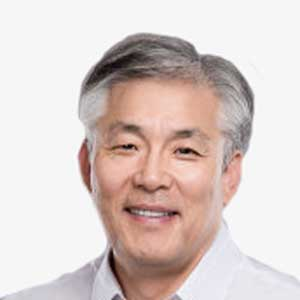
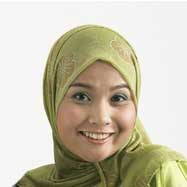
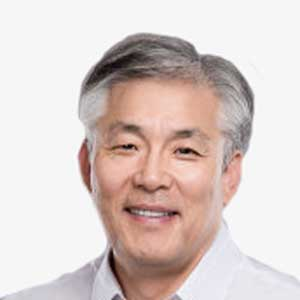
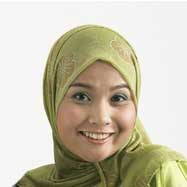
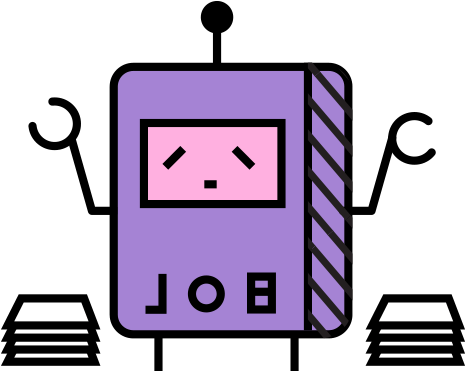
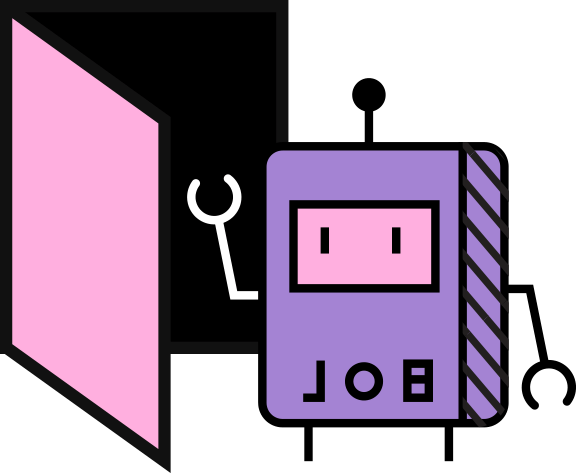
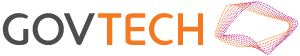
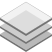
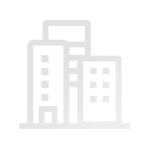
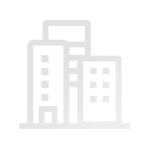
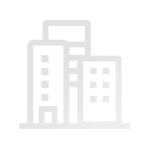
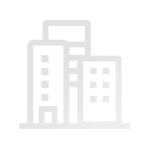
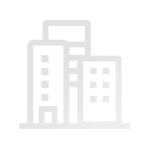
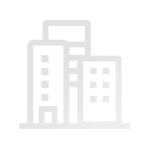
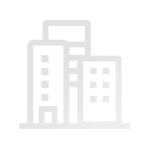
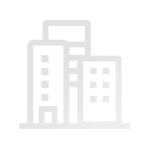
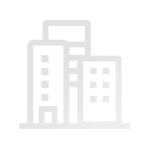
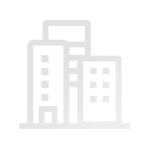
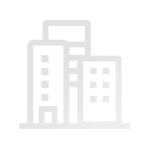
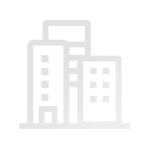
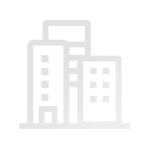
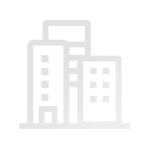
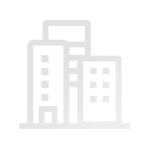
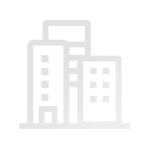

In [87]:
print(soup.prettify())

In [100]:
import re

for entry in soup.findAll('span', {'id':'search-results-message'}):
    print entry.text
    print int(re.findall(r'\d+', entry.text)[0])/20

383 jobs foundShow 273 jobs with government support
19


In [14]:
company=[]
jobtitle=[]
jobdesc=[]
salary=[]

In [16]:
for entry in soup.findAll('div', {'class':'card relative '}):
    #company name
    #print entry.find('p', {'name':'company'}).text
    company.append(entry.find('p', {'name':'company'}).text)
    #job title
    #print entry.find('h1', {'name':'job_title'}).text
    jobtitle.append(entry.find('h1', {'name':'job_title'}).text)
    #job desc

In [24]:
#getting the lnks for each job
for entry in soup.findAll('div', {'class':'card relative '}):
    print entry.find('a').get('href')

/job/business-analyst-finance-accounting-ingredion-singapore-e6ef563150c45b14f42e8ae53ec3654e
/job/digital-business-analyst-intellect-minds-6c85d6457c399ba04a25e4d597720325
/job/business-analyst-allegis-global-solutions-d0ccc67336bdecfe8ff20c2c0fd436e7
/job/project-manager-business-analyst-mifir-addstones-sas-9838a12506aa179ad6c81c5c7ab81f35
/job/business-analyst-kyc-client-on-boarding-optimum-solutions-d654db05e177404325ed56533c4176e1
/job/business-analyst-government-technology-agency-e7fe5a5f52320c575346dac5d9470b26
/job/business-analyst-strategy-planning-apjc-cisco-systems-493277c5886a1b70b07f1ad0e72cc470
/job/business-analyst-audit-confirmation-allegis-global-solutions-8e9ba87c451e772923c7c29ad545c10d
/job/senior-business-analyst-firium-solutions-82546907ea1e61f653faeb0dee263584
/job/business-analyst-hp-pps-asia-pacific-1399139c04c6d8e65539832ec0b23931
/job/business-analyst-myrepublic-d333954ceeb706a085f84eb4f0178ee4
/job/senior-business-analyst-blue-star-infostack-solutions-14377e

In [32]:
page_number=[]
for entry in soup.findAll('span', {'type':'action'}):
    if entry.text.isdigit():
        page_number.append(entry.text)
print page_number
print len(page_number)

3


In [191]:
jobs=[]

# create a function to search through the search term
def searchjobs(searchterm):
    page=0
    jobtitle=searchterm.replace(' ','%20')
    link = "https://www.mycareersfuture.sg/search?search"+jobtitle+"&page="+str(page)
    print link
    # Visit our relevant page.
    driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver.exe")
    driver.get(link)
    # Wait six second.
    sleep(6)
    # Grab the page source.
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    #close the browser
    driver.close()
    
    #add 1st page of jobs
    addjob_list(soup)
    
    #get the next 13 pages
    #get the number of pages
    page_number=12
    #print page_number
    #print len(page_number)
    while page < page_number:
        page += 1
        link = "https://www.mycareersfuture.sg/search?search"+jobtitle+"&page="+str(page)
        # Visit our relevant page.
        driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver.exe")
        driver.get(link)
        # Wait six second.
        sleep(6)
        # Grab the page source.
        html = driver.page_source
        soup = BeautifulSoup(html, 'lxml')
        #close the browser
        driver.close()
        addjob_list(soup)
        
def addjob_list(soup):
    for entry in soup.findAll('div', {'class':'card relative '}):
        jobs.append(entry.find('a').get('href'))

In [192]:
searchjobs('business analyst')
searchjobs('business intelligence')
searchjobs('AI scientist')
searchjobs('AI engineer')
searchjobs('statistician')

https://www.mycareersfuture.sg/search?searchdata%20analyst&page=0
https://www.mycareersfuture.sg/search?searchbusiness%20intelligence&page=0
https://www.mycareersfuture.sg/search?searchAI%20scientist&page=0
https://www.mycareersfuture.sg/search?searchAI%20engineer&page=0
https://www.mycareersfuture.sg/search?searchstatistician&page=0


In [193]:
len(jobs)

1300

In [196]:
# checking the job list
jobs_list = set(jobs)
jobs_list= list(jobs_list)

for job in jobs_list:
    print job

/job/programme-coordinator-sg-rehab-a5949a392443bcda263020ce14be14b2
/job/copper-trader-10k-personnel-link-jobhub-8338eeb22e477c301e0c594e5d3bd5eb
/job/business-development-sales-executive-tripadvisor-singapore-fee49068583771d6c96a4aabdd16577d
/job/human-resources-associate-singapore-google-asia-pacific-508ff38ceee0a16c2dbc03b66730f287
/job/wsh-coordinator-kimly-construction-c7cd96741b76e9053859625b546b2fc0
/job/chef-lourdes-gavin-140a547afaab6783f754526140b21db2
/job/process-technician-lourdes-gavin-1357de62223940f6b781bb073eccd7df
/job/steel-trader-7000-personnel-link-jobhub-e3d872af420b0e82ba4d42ac77b894e1
/job/graphic-designer-senior-graphic-designer-blackblue-media-group-ebb48c90d1037e15ddb9f1404b0d5abf
/job/operational-support-executive-interplex-precision-technology-3429b3fd35532f9ea6d51ccb999d10ab
/job/software-support-engineer-servlink-technology-resources-19cf8af7da9f3032a81ffdf80092eb4f
/job/senior-application-support-analyst-apar-technologies-46f81680d448c5588882d79f72ea37a

In [197]:
len(jobs_list)

260

In [145]:
# Visit our relevant page.
driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver.exe")
driver.get("https://www.mycareersfuture.sg/job/system-server-engineer-kddi-singapore-05d06e3881d4ea8272bdd17cd13886a5")

# Wait six second.
sleep(6)
# Grab the page source.
html = driver.page_source

# Beautiful Soup it!
soup = BeautifulSoup(html, 'lxml')

driver.close()

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   IT System &amp; Server Engineer (Maintenance Support) | MyCareersFuture
  </title>
  <meta content="MyCareersFuture " property="og:title"/>
  <meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have considered before, or find jobs with government support." property="og:description"/>
  <meta content="https://www.mycareersfuture.sg" property="og:url"/>
  <meta content="https://www.mycareersfuture.sg/images/og-mcf-logo.png" property="og:image"/>
  <meta content="MyCareersFuture" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="cNK77SoJSM_t-TivaafxeOjn7sqTJDdi7TVwyMDLtLA" name="google-site-verification"/>
  <meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs
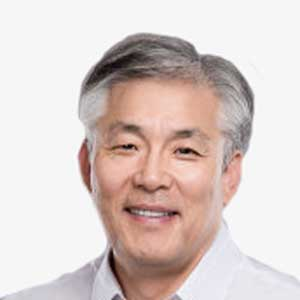
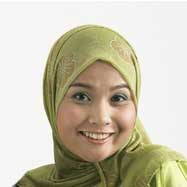
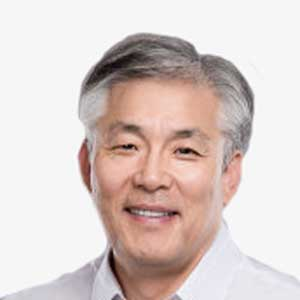
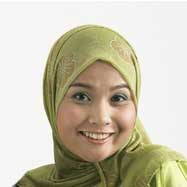
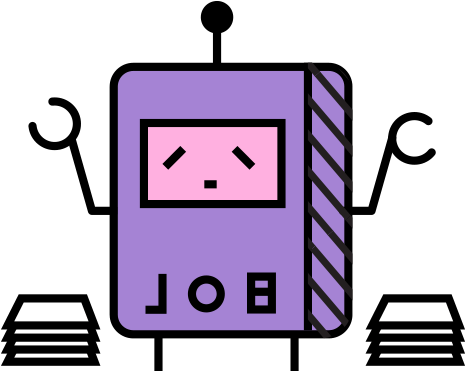
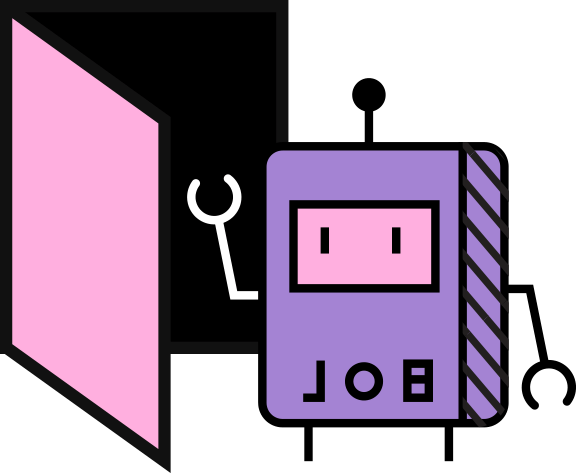
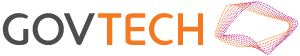
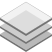
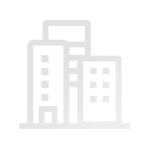
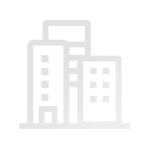

In [146]:
print(soup.prettify())

In [180]:
# How the job info will be extracted
company_name = soup.find('p', {'id':'company'}).getText()
print company_name

job_name = soup.find('h1', {'id':'job_title'}).getText()
print job_name

job_salary = []
for item in soup.findAll('span', {'class':'dib'}):
    job_salary.append(item.text)

print job_salary[1].replace('to', ' - ')

#Job role
job_role = soup.find('div', {'id':'content'}).getText()
print job_role

#Job requirements
job_require = soup.find('div', {'id':'requirements'}).find('div', {'id':'content'}).text
print job_require

KDDI SINGAPORE PTE LTD
IT System & Server Engineer (Maintenance Support)
$3,000 - $4,000
We are looking for a responsible IT System & Server Engineer to provide technical maintenance support for our corporate customers.  Main duties are:  1. Provide customers with timely, professional and effective IT support (via Onsite, Remote and Phone Support). 2. Support Cloud (Office365, AWS) / Enterprise IT solutions (Virtualization, Backup and Storage, Anti-Virus). 3. Support various Servers and Desktop Hardware and OS (eg. Windows, Linux). 4. Vendor coordination and management. 5. Create and maintain technical documentation to eusure efficient planning and execution.  
1. Experience in IT Support or System Integration (SI) Engineer. 2. Hands on experience with MS Active Derectory, Windows and Linux OS, Backup and Antivirus Solutions, Office365, Virtualization. 3. Ability to support Onsite (80%) and Remote & Phone Support (20%). 4. Good verbal and written communication skills. 5. Positive thihk

In [206]:
company=[]
jobtitle=[]
jobrole=[]
jobrequire=[]
salary=[]

#This is the function to extract job info
def getjob_one(link):
    # Visit our relevant page.
    driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver.exe")
    driver.get(link)

    # Wait six second.
    sleep(6)
    # Grab the page source.
    html = driver.page_source

    # Beautiful Soup it!
    soup = BeautifulSoup(html, 'lxml')

    driver.close()
    #company name
    try:
        company_name = soup.find('p', {'id':'company'}).getText()
        company.append(company_name) 
    except AttributeError:
        company.append('None')
        
    #job name
    try:
        job_name = soup.find('h1', {'id':'job_title'}).getText()
        jobtitle.append(job_name)
    except AttributeError:
        jobtitle.append('None')
    
    #salary
    job_salary = []
    try:
        for item in soup.findAll('span', {'class':'dib'}):
            job_salary.append(item.text)
        salary.append(job_salary[1].replace('to', ' - '))
    except AttributeError:
        salary.append('None')
    except IndexError:
        salary.append('None')
    
    #Job role
    try:
        job_role = soup.find('div', {'id':'content'}).getText()
        jobrole.append(job_role) 
    except AttributeError:
        jobrole.append('None')

    #Job requirements
    try:
        job_require = soup.find('div', {'id':'requirements'}).find('div', {'id':'content'}).text
        jobrequire.append(job_require)
    except AttributeError:
        jobrequire.append('None')

In [ ]:
def getjob_all(jobs_list):
    for job in jobs_list:
        link = "https://www.mycareersfuture.sg"+job
        getjob_one(link)

In [207]:
getjob_all(jobs_list)

In [208]:
#check the length
print len(company)
print len(jobtitle)
print len(jobrole)
print len(jobrequire)
print len(salary)

260
260
260
260
260


In [250]:
import pandas as pd
#convert to pd
result = [('company_name', company),
          ('job_title', jobtitle),
          ('job_role', jobrole),
          ('job_requirement', jobrequire),
          ('salary', salary)
         ]

In [251]:
df = pd.DataFrame.from_items(result)

In [252]:
df.head(5)

,company_name,job_title,job_role,job_requirement,salary
0,SG REHAB PTE. LTD.,Programme Coordinator,SG Rehab is recruiting on behalf of a client t...,Advanced/ Higher/ Certificate in Community an...,Salary undisclosed
1,PERSONNEL LINK JOBHUB PTE. LTD.,Copper Trader - Up to $10K,Copper Trader - Follow up on contracts -Develo...,-Degree with min 3 to 5 years Copper industry ...,"$5,000 - $10,000"
2,TRIPADVISOR SINGAPORE PRIVATE LIMITED,Business Development Sales Executive,We are looking for an experienced Business Dev...,What We Need From You: Extensive sales experi...,"$3,600 - $4,800"
3,GOOGLE ASIA PACIFIC PTE. LTD.,Human Resources Associate - Singapore,The role: Human Resources Associates People Op...,Minimum qualifications: BA/BS degree in Mark...,
4,KIMLY CONSTRUCTION PRIVATE LIMITED,WSH Coordinator,To assist the WSHO/ECO in administering and i...,Minimum 2 years’ experience as a WSH coordin...,"$2,800 - $3,800"


In [467]:
df.isnull().sum()

company_name    0
job_title       0
job_desc        0
salary          0
dtype: int64

In [264]:
value = df.iloc[3, 4]
print value
#some values are empty
len(df.loc[df['salary'] == value])

27

In [276]:
df['salary'] = df['salary'].replace({value: 'None'})
print len(df.loc[df['salary'] == value])
df.head(5)

0


,company_name,job_title,job_role,job_requirement,salary
0,SG REHAB PTE. LTD.,Programme Coordinator,SG Rehab is recruiting on behalf of a client t...,Advanced/ Higher/ Certificate in Community an...,Salary undisclosed
1,PERSONNEL LINK JOBHUB PTE. LTD.,Copper Trader - Up to $10K,Copper Trader - Follow up on contracts -Develo...,-Degree with min 3 to 5 years Copper industry ...,"$5,000 - $10,000"
2,TRIPADVISOR SINGAPORE PRIVATE LIMITED,Business Development Sales Executive,We are looking for an experienced Business Dev...,What We Need From You: Extensive sales experi...,"$3,600 - $4,800"
3,GOOGLE ASIA PACIFIC PTE. LTD.,Human Resources Associate - Singapore,The role: Human Resources Associates People Op...,Minimum qualifications: BA/BS degree in Mark...,None
4,KIMLY CONSTRUCTION PRIVATE LIMITED,WSH Coordinator,To assist the WSHO/ECO in administering and i...,Minimum 2 years’ experience as a WSH coordin...,"$2,800 - $3,800"


In [278]:
df.shape

(260, 5)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
company_name       260 non-null object
job_title          260 non-null object
job_role           260 non-null object
job_requirement    260 non-null object
salary             260 non-null object
dtypes: object(5)
memory usage: 10.2+ KB


In [290]:
#convert pd to csv
df.to_csv('webscrape-geraldine.csv', encoding='utf-8', index=False)

In [291]:
#check the csv file
data = pd.read_csv('./webscrape-geraldine.csv')

In [293]:
data.head()

,company_name,job_title,job_role,job_requirement,salary
0,SG REHAB PTE. LTD.,Programme Coordinator,SG Rehab is recruiting on behalf of a client t...,Advanced/ Higher/ Certificate in Community an...,Salary undisclosed
1,PERSONNEL LINK JOBHUB PTE. LTD.,Copper Trader - Up to $10K,Copper Trader - Follow up on contracts -Develo...,-Degree with min 3 to 5 years Copper industry ...,"$5,000 - $10,000"
2,TRIPADVISOR SINGAPORE PRIVATE LIMITED,Business Development Sales Executive,We are looking for an experienced Business Dev...,What We Need From You: Extensive sales experi...,"$3,600 - $4,800"
3,GOOGLE ASIA PACIFIC PTE. LTD.,Human Resources Associate - Singapore,The role: Human Resources Associates People Op...,Minimum qualifications: BA/BS degree in Mark...,None
4,KIMLY CONSTRUCTION PRIVATE LIMITED,WSH Coordinator,To assist the WSHO/ECO in administering and i...,Minimum 2 years’ experience as a WSH coordin...,"$2,800 - $3,800"


## scraping ST jobs: http://www.stjobs.sg/

In [ ]:
# There tends to be less than 50 jobs per serach term so right off the bat I'm viewing the first 50 jobs though it'll be less
# example link: http://www.stjobs.sg/singapore-jobs/data+scientist-jobs-search/view-50-jobs
# though it says view 50 jobs, it's really not

In [297]:
# starting with the search term data scientist
url = "http://www.stjobs.sg/singapore-jobs/data+scientist-jobs-search/view-50-jobs"
#download the URL and extract the content to the variable html 

page = requests.get(url)

#specifying a desired format of “page” using the html parser - 
# this allows python to read the various components of the page, rather than treating it as one long string.
soup = BeautifulSoup(page.text, "html.parser")

In [320]:
job_links2=[]
for entry in soup.findAll('a', {'class':'view_companyprofile text-bold'}):
    #print entry.get('href')
    job_links2.append(entry.get('href'))

In [308]:
job_links2

[u'/urgent-opening-for-data-analyst-scientist-sql-and-excel-job/view-job/1639134',
 u'/data-engineer-job/view-job/1639358',
 u'/research-scientist-1-year-contract-living-analytics-research-centre-job/view-job/1640633',
 u'/research-scientist-1-year-contract-fujitsu-smu-urban-computing-engineering-job/view-job/1640612',
 u'/senior-research-scientist-1-year-contract-living-analytics-research-centre-job/view-job/1640641',
 u'/research-scientist-2-year-contract-living-analytics-research-centre-job/view-job/1640634',
 u'/research-scientist-2-year-contract-living-analytics-research-centre-job/view-job/1640635',
 u'/research-scientist-1-year-contract-fujitsu-smu-urban-computing-engineering-job/view-job/1640500',
 u'/research-scientist-1-year-contract-fujitsu-smu-urban-computing-engineering-job/view-job/1639860',
 u'/research-fellow-2-year-contract-living-analytics-research-centre-job/view-job/1640636',
 u'/research-fellow-2-year-contract-living-analytics-research-centre-job/view-job/1640619',

In [337]:
#creating the function to search for the links
def getstjobs_links(search):
    search=search.replace(' ', '+')
    # print search
    link = 'http://www.stjobs.sg/singapore-jobs/'+search+'-jobs-search/view-50-jobs'
    print link
    page = requests.get(link)
    soup = BeautifulSoup(page.text, "html.parser")
    # print(soup.prettify())
    for entry in soup.findAll('a', {'class':'view_companyprofile text-bold'}):
        #print entry.get('href')
        job_links2.append(entry.get('href'))

In [453]:
getstjobs_links('data scientist')
getstjobs_links('data analyst')
getstjobs_links('business analyst')
getstjobs_links('business intelligence')
getstjobs_links('AI scientist')
getstjobs_links('AI engineer')
getstjobs_links('statistician')
getstjobs_links('data')
getstjobs_links('AI')

http://www.stjobs.sg/singapore-jobs/data+scientist-jobs-search/view-50-jobs
http://www.stjobs.sg/singapore-jobs/data+analyst-jobs-search/view-50-jobs
http://www.stjobs.sg/singapore-jobs/business+analyst-jobs-search/view-50-jobs
http://www.stjobs.sg/singapore-jobs/business+intelligence-jobs-search/view-50-jobs
http://www.stjobs.sg/singapore-jobs/AI+scientist-jobs-search/view-50-jobs
http://www.stjobs.sg/singapore-jobs/AI+engineer-jobs-search/view-50-jobs
http://www.stjobs.sg/singapore-jobs/statistician-jobs-search/view-50-jobs
http://www.stjobs.sg/singapore-jobs/data-jobs-search/view-50-jobs
http://www.stjobs.sg/singapore-jobs/AI-jobs-search/view-50-jobs


In [454]:
#root out the duplicates
jobs2 = set(job_links2)
jobs2=list(jobs2)

In [455]:
len(jobs2)

88

In [456]:
company2=[]
jobtitle2=[]
jobdesc2=[]
salary=[]

# get one job details
def getstjob_one(link):
    #print link
    page = requests.get(link)
    soup = BeautifulSoup(page.text, "html.parser")
    
    #company name
    try:
        company_name = soup.find('h4').getText()
        company_name=company_name.split('\n')
        company2.append(company_name[1]) 
    except AttributeError:
        company2.append('Null')
        
    #job title
    try:
        job_title = soup.find('h3', {'class':'text-primary'}).getText()
        jobtitle2.append(job_title) 
    except AttributeError:
        jobtitle2.append('Null')   
    
    #job desc
    try:
        job_desc = soup.find('div', {'id':'jd-sec'}).getText()
        job_desc=job_desc.split('\n')
        jobdesc2.append(job_desc[1]) 
    except AttributeError:
        jobdesc2.append('Null')
        
    #salary
    try:
        s = soup.find('div', {'class':'job-summary'}).getText()
        s=s.split('\n')
        s=s[2].split(' ')
        salary.append(s[5]) 
    except AttributeError:
        salary.append('Null')   

In [457]:
getstjob_one('http://www.stjobs.sg/edm-technician-cnc-edm-wirecut-preferably-sodick-machines-job/view-job/1641297')
print company2
print jobtitle2
print jobdesc2
print salary

[u'The Supreme HR Advisory Pte Ltd']
[u'EDM Technician[CNC EDM/ Wirecut, Preferably Sodick machines]']
[u' North Attractive Salary Career Progression Opportunities  Interested applicants can send your resume to supreme.terryyeo1@gmail.com and allow our Consultants to match you with our Clients. No Charges will be incurred by Candidates for any service rendered.  *Requirements and Skills At least 3 years experience in Precision CNC EDM/ Wirecut Preferably Sodick machines Professional certificate Able to travel to Malaysia as and when required Shift work required  *Job Description   Able to operate machines to achieve high accuracy and fine finishing Surface Grinding foundation Able to maintain equipment and machines Reg No R1871723 Ea No 14c7279 Job Type: Full-time Job Type: Full-time ']
[u'1250']


In [458]:
def getstjob_all(jobs2):
    for job in jobs2:
        link='http://www.stjobs.sg'+job
        getstjob_one(link)

In [459]:
getstjob_all(jobs2)

In [460]:
#run a check
print len(company2)
print len(jobtitle2)
print len(jobdesc2)
print len(salary)

89
89
89
89


In [461]:
#convert to pd
result2 = [('company_name', company2),
          ('job_title', jobtitle2),
          ('job_desc', jobdesc2),
          ('salary', salary)
         ]

In [462]:
df = pd.DataFrame.from_items(result2)

In [463]:
df.head()

,company_name,job_title,job_desc,salary
0,The Supreme HR Advisory Pte Ltd,"EDM Technician[CNC EDM/ Wirecut, Preferably So...",North Attractive Salary Career Progression Op...,1250
1,BGC GROUP PTE LTD,Data Entry Officer / Public Surveyor - JP,BGC Group is hiring 50 full-time data entry of...,Undisclosed
2,Singapore Management University (SMU) ...,"Research Scientist (1-year contract), Fujitsu-...",JOB DESCRIPTION Work under supervision of Pri...,Undisclosed
3,Singapore Management University (SMU) ...,"Research Scientist (2-year contract), Living A...",JOB DESCRIPTION The Living Analytics Research...,Undisclosed
4,Vault Dragon Posted On :20 ...,Data Analyst,Responsibilities Design and implement database...,3500


In [464]:
#convert pd to csv
df.to_csv('webscrape-stjobs-geraldine.csv', encoding='utf-8', index=False)

In [465]:
# This is for st jobs, only 87 unique rows though used the search terms 'data scientist', 'data analyst','business analyst','AI scientist',''AI engineer','statistician','data','AI'
#check the csv file
data = pd.read_csv('./webscrape-stjobs-geraldine.csv')

In [469]:
data.head()

,company_name,job_title,job_desc,salary
0,The Supreme HR Advisory Pte Ltd,"EDM Technician[CNC EDM/ Wirecut, Preferably So...",North Attractive Salary Career Progression Op...,1250
1,BGC GROUP PTE LTD,Data Entry Officer / Public Surveyor - JP,BGC Group is hiring 50 full-time data entry of...,Undisclosed
2,Singapore Management University (SMU) ...,"Research Scientist (1-year contract), Fujitsu-...",JOB DESCRIPTION Work under supervision of Pri...,Undisclosed
3,Singapore Management University (SMU) ...,"Research Scientist (2-year contract), Living A...",JOB DESCRIPTION The Living Analytics Research...,Undisclosed
4,Vault Dragon Posted On :20 ...,Data Analyst,Responsibilities Design and implement database...,3500
